# Data Collection

### Import Data 

In [1]:
import sys
#!{sys.executable} -m pip install ebooklib
#!{sys.executable} -m pip install epub-conversion
#!{sys.executable} -m pip install bs4
#!{sys.executable} -m pip install html2text
#!{sys.executable} -m pip install nltk
#make sure to download the python github repository affectr-python
#then run the command 'python setup.py install' in terminal after cd'ing to the correct folder
#!{sys.executable} -m pip install affectr


In [2]:
import ebooklib
from ebooklib import epub
book_name = "EitherOr A Fragment of Life by Kierkegaard Søren, Hannay Alastair.epub"
book = epub.read_epub(book_name)

In [3]:
chapters = []
for item in book.get_items():
    if item.get_type() == ebooklib.ITEM_DOCUMENT:
        print(item)
        chapters.append(item.get_content())

<EpubHtml:cover:Text/cover.html>
<EpubHtml:fm:Text/9780140445770_Either-Or_000.html>
<EpubHtml:chapter01:Text/9780140445770_Either-Or_001.html>
<EpubHtml:chapter02:Text/9780140445770_Either-Or_002.html>
<EpubHtml:chapter03:Text/9780140445770_Either-Or_003.html>
<EpubHtml:chapter04:Text/9780140445770_Either-Or_004.html>
<EpubHtml:chapter05:Text/9780140445770_Either-Or_005.html>
<EpubHtml:chapter06:Text/9780140445770_Either-Or_006.html>
<EpubHtml:chapter07:Text/9780140445770_Either-Or_007.html>
<EpubHtml:chapter08:Text/9780140445770_Either-Or_008.html>
<EpubHtml:chapter09:Text/9780140445770_Either-Or_009.html>
<EpubHtml:chapter10:Text/9780140445770_Either-Or_010.html>
<EpubHtml:chapter11:Text/9780140445770_Either-Or_011.html>
<EpubHtml:chapter12:Text/9780140445770_Either-Or_012.html>
<EpubHtml:chapter13:Text/9780140445770_Either-Or_013.html>
<EpubHtml:chapter14:Text/9780140445770_Either-Or_014.html>
<EpubHtml:chapter15:Text/9780140445770_Either-Or_000_Footnote.html>
<EpubHtml:cover.xhtml

### Clean Data

Examine the table of contents of the book and determine which chapters to keep. Double check your indexes by displaying the first and last chapter.

In [4]:
from bs4 import BeautifulSoup

#remove first couple chapters and last chapters, as we can see they aren't part of the useful text of the book
#then extract only text from HTML mess
#also remove new lines
chapters_text = [BeautifulSoup(chap).text.replace('\n',' ') for chap in chapters[2:15]]

#print(chapters_text[8])


In [5]:
import nltk
nltk.download('punkt')
#Tokenize sentences into a list of lists
a_list = [nltk.tokenize.sent_tokenize(chap) for chap in chapters_text]
# Get the size of list of list using list comprehension & sum() function
count = sum( [ len(listElem) for listElem in a_list])
print(str(count) + " sentences")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paulmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


9371 sentences


Here I print the 1st sentence to determine the chapter name, then double-check by examing the table of contents page. Below we can see title 8 is unusual because the first sentence is not capitalized. Checking our book, we can see that it is not a new chapter and should therefore be included in the previous chapter.

In [6]:
count = 0
for chapter in a_list:
    print(str(count) + 'title: ' + chapter[0] + '\n')
    count += 1

0title:   PART ONE  CONTAINING THE PAPERS OF A Are passions, then, the pagans of the soul?

1title:   1 DIAPSALMATA  ad se ipsum  Grandeur, savoir, renommé, Amitié, plaisir et bien, Tout n’est que vent, que fumée: Pour mieux dire, tout n’est rien.1  WHAT is a poet?

2title:   2 THE IMMEDIATE EROTIC STAGES   OR   THE MUSICAL EROTIC  PLATITUDINOUS INTRODUCTION From the moment my soul was first overwhelmed in wonder at Mozart’s music, and bowed down to it in humble admiration, it has often been my cherished and rewarding pastime to reflect upon how that happy Greek view that calls the world a cosmos, because it manifests itself as an orderly whole, a tasteful and transparent adornment of the spirit that works upon and in it – upon how that happy view repeats itself in a higher order of things, in the world of ideals, how it may be a ruling wisdom there too, mainly to be admired for joining together those things that belong with one another: Axel with Valborg, Homer with the Trojan War, Ra

Combine the two chapters and remove the duplicate. Then check if anything was deleted by counting the sum of elements in the 2d array and comparing it to before. (Previous count was 9371 sentences, looks good!)

In [7]:
a_list[7:8] = [a_list[7] + a_list[8]]
del a_list[8]
count = 0
for chapter in a_list:
    print(str(count) + 'title: ' + chapter[0] + '\n')
    count += 1
    
count = sum( [ len(listElem) for listElem in a_list])
print(str(count) + " sentences")

0title:   PART ONE  CONTAINING THE PAPERS OF A Are passions, then, the pagans of the soul?

1title:   1 DIAPSALMATA  ad se ipsum  Grandeur, savoir, renommé, Amitié, plaisir et bien, Tout n’est que vent, que fumée: Pour mieux dire, tout n’est rien.1  WHAT is a poet?

2title:   2 THE IMMEDIATE EROTIC STAGES   OR   THE MUSICAL EROTIC  PLATITUDINOUS INTRODUCTION From the moment my soul was first overwhelmed in wonder at Mozart’s music, and bowed down to it in humble admiration, it has often been my cherished and rewarding pastime to reflect upon how that happy Greek view that calls the world a cosmos, because it manifests itself as an orderly whole, a tasteful and transparent adornment of the spirit that works upon and in it – upon how that happy view repeats itself in a higher order of things, in the world of ideals, how it may be a ruling wisdom there too, mainly to be admired for joining together those things that belong with one another: Axel with Valborg, Homer with the Trojan War, Ra

Later we will change the chapter number to these chapter names we have just found. We will continue using 0 as the first chapter/index.

In [8]:
chapter_names = {'0':'Preface', 
                 '1':'Diapsalmata', 
                 '2':'The Immediate Erotic Stages or the Musical Erotic', 
                 '3':'Ancient Tragedys Rreflection in the Modern', 
                 '4':'Shadowgraphs', 
                 '5':'Crop Rotation', 
                 '6':'Crop Rotation', 
                 '7':'The Seducers Diary', 
                 '8':'The Aesthetic Validity of Marriage', 
                 '9':'Equilibrium Between the Aesthetic and the Ethical in the Development of Personality', 
                 '10':'Last Word', 
                 '11':'The Edifying in the Thought that Against God We Are Always in the Wrong'}

# Sentiment Analysis

## Collect Negative, Positive, Neutral, and Compound Sentiment Scores
This analysis centers around the library VADER (Valence Aware Dictionary and sEntiment Reasoner), a well-known and highly regarded sentiment analysis tool. While normally applied to social media sentences, we will try it out on philosophy. Given a sentence, VADER will score the sentence with a fraction of how positive, negative, and neutral the sentence. These fractions add up to 1, and can be thought of as percentages. The compound score is then calculated from the 3 scores, more info can be found [here](https://github.com/cjhutto/vaderSentiment). The range of values for our compound scores is between -1 and 1, with 0 being perfectly neutral. <br> <br>
VADER sentiment analysis is not ideal for our body of work, as it is trained on social media text, is not fine-tuned to our specific dataset, and does not factor in the context of sentences as recursive neural networks do. It is however free, easy to access, and not computationally heavy so we will use it as a preliminary analysis tool.

In [9]:
#!{sys.executable} -m pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

Let's check some of our sentences and see if we find the sentiment scores reasonable.

In [10]:
#test sentiment scores with random sentences
def sentiment_analyzer_scores(sentence, print_stat = False):
    score = analyzer.polarity_scores(sentence)
    if(print_stat == True):
        print("{:-<40} {}".format(sentence, str(score)))
    return(score)

#Check the sentiment of the 4th sentence is the 1st chapter (python indexes start at 0)
sentiment_analyzer_scores(a_list[0][3], print_stat = True)

Your life has perhaps brought you into touch with people of whom you suspected something of the kind, yet without being able to wrest their secret from them by force or guile. {'neg': 0.054, 'neu': 0.85, 'pos': 0.096, 'compound': 0.3612}


{'neg': 0.054, 'neu': 0.85, 'pos': 0.096, 'compound': 0.3612}

In [11]:
import pandas as pd

sent_list = []
test_scores = sentiment_analyzer_scores(a_list[0][3])
count = 0
for chapter in a_list:
    for x in range(0, len(chapter)):
        sentence = chapter[x].rstrip('\n')
        scores = sentiment_analyzer_scores(sentence)
        sent_list.append([sentence, 
                          count, 
                          scores['neg'], 
                          scores['neu'], 
                          scores['pos'], 
                          scores['compound']])
    count += 1

In [12]:
sent_df = pd.DataFrame(sent_list, columns=['sentence', 
                                'chapter', 
                                'neg', 
                                'neu', 
                                'pos', 
                                'compound'])
sent_df = sent_df.reset_index()
sent_df['chapter'] = sent_df['chapter'].astype('str')
sent_df['chapter_text'] = sent_df['chapter'].map(chapter_names)
sent_df['chapter_text'] = sent_df['chapter_text'].astype('str')

sent_df.head()

,index,sentence,chapter,neg,neu,pos,compound,chapter_text
0,0,PART ONE CONTAINING THE PAPERS OF A Are pas...,0,0.000,0.814,0.186,0.4939,Preface
1,1,Reason alone baptized?,0,0.500,0.500,0.000,-0.2500,Preface
2,2,Edward Young1 PREFACE PERHAPS it has sometime...,0,0.083,0.773,0.144,0.6486,Preface
3,3,Your life has perhaps brought you into touch w...,0,0.054,0.850,0.096,0.3612,Preface
4,4,Perhaps neither case applies to you and your l...,0,0.071,0.857,0.071,0.0000,Preface


### Merge 2 Chapters Together

In [13]:
#correct duplicate chapter numbers for later
def merge_chapters(chap_left, chap_right):
    sent_df.chapter = sent_df.chapter.astype("int").replace(chap_right, chap_left)
    chap_numbers = sent_df.chapter.unique()
    for i in range(chap_left, chap_numbers[-1], 1):
        sent_df.chapter = sent_df.chapter.replace(i+1, i)
merge_chapters(5, 6)

In [14]:
def moving_average(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

## Plot Compound Sentiment Across All Chapters

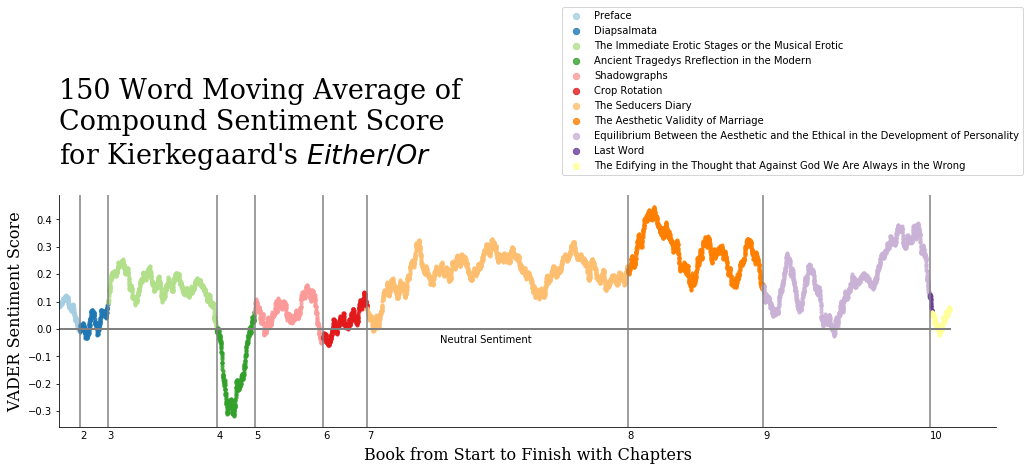

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Calculate Moving Average for Compound Score
y = sent_df['compound']
sent_df['moving_avg_comp'] = moving_average(y, 150)

font = {'family': 'serif', 
        "weight": 'normal', 
        'size': 27,}

sns.lmplot(y='moving_avg_comp', x='index', data=sent_df, 
           hue='chapter_text', fit_reg=False, 
           height=4, aspect=3.5, legend=False, palette='Paired', 
           scatter_kws={"s": 10})

#Add vertical lines
chapter_places = sent_df['chapter'].diff()[lambda x: x != 0].index.tolist()

for i in range(1,len(chapter_places)-1,1):
    plt.axvline(x=chapter_places[i], color="gray")
    plt.text(chapter_places[i],-.4, i+1)

#Graph formatting
plt.xlim(0)
plt.text(4000,-.05, "Neutral Sentiment")
plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=2, markerscale=2.0)
plt.plot([1,9370], [0,0], linewidth=2, color = "gray")
plt.title("150 Word Moving Average of \nCompound Sentiment Score \nfor Kierkegaard's $\it{Either/Or}$", 
          loc='left', pad = 30, fontdict = font)
font = {'family': 'serif', 
        "weight": 'normal', 
        'size': 16,}
plt.xlabel("Book from Start to Finish with Chapters", fontdict = font, labelpad = 20)
plt.ylabel("VADER Sentiment Score", fontdict = font)
plt.xticks([])
plt.show()

#### Graph Analysis
First some background of the text is necessary <br><br>
Kierkegaard's *Either/Or* explores one of human's most pondered questions, how should we live? It is an interesting book to analyze because it is composed of a narrator and the correspondences between two opposite-thinking psuedonyms of Kierkegaard, named A and B. The Preface is a story of how these papers were found, in an old desk (which is somewhat of a trope of Kierkegaard's, adding to the sense of mystery and discovery). The first part of the book of seven chapters is written by author A, titled *Either* and the last four chapters are written by B in response to A titled *Or*. Keep in mind the numbers represent when that chapter starts, *The Seducer's Diary* is written by A and argues for the aesthetic lifestyle. <br><br> Authors A and B argue for two very different types of lifestyles. A argues for a lifestyle described by Kierkegaard as the __aesthetic__, generally living life with flexible morality and pursuing new and exciting experiences with no commitments. B on the other hand advocates for the __ethical__ life, living life with set morals and pursuing lasting happiness through long-held relationships, like marriage. Our analysis investigates this philosophical divide by examining sentiment and we can isolate each author's works by their respective chapters.

Aesthetic chapters 2-7: A quick look at this portion of the book reveals both positive and negative sentiment, chapter 3 being largely positive and chapter 4 being very much negative. While obviously the most negative chapter of the book, it is interesting to see the sharp changes in the moving average as we start chapters 3 and 4. Perhaps the topic of the chapters is naturally characterized as negative or positive, and our VADER sentiment analysis captures this topic instead of the tone. <br><br>
Ethical chapters 8-11: This section of the book, written by author B, seems to be more positive overall and with an interesting degree of variability, almost cyclical at times. I think the most interesting analysis however comes with reading the text, as you can pinpoint changes in sentiment with the context of the text. <br><br>

#### Add Psuedonyms Column for either Narrator, Author A, or Author B

In [26]:
chapter_author = {'Preface':'Neutral', 
                 'Diapsalmata':'Aesthetic', 
                 'The Immediate Erotic Stages or the Musical Erotic':'Aesthetic', 
                 'Ancient Tragedys Rreflection in the Modern':'Aesthetic', 
                 'Shadowgraphs':'Aesthetic', 
                 'Crop Rotation':'Aesthetic',  
                 'The Seducers Diary':'Aesthetic', 
                 'The Aesthetic Validity of Marriage':'Ethical', 
                 'Equilibrium Between the Aesthetic and the Ethical in the Development of Personality':'Ethical', 
                 'Last Word':'Ethical', 
                 'The Edifying in the Thought that Against God We Are Always in the Wrong':'Ethical'}
sent_df['chapter_author'] = sent_df['chapter_text'].map(chapter_author)

## Plot a Single Chapter's Sentiment

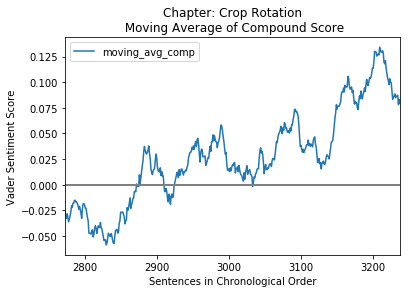

In [27]:
def plot_chapter(chap_num):
    name = "Chapter: " + str(chapter_names[str(chap_num)]) + "\n Moving Average of Compound Score"
    data = sent_df[sent_df['chapter'] == chap_num]
    width = len(data)
    start = data.index[0]
    data.plot(kind="line", x='index', y='moving_avg_comp')
    plt.plot([start, start+width], [0,0], linewidth=2, color="gray")
    plt.title(name)
    plt.ylabel("Vader Sentiment Score")
    plt.xlabel("Sentences in Chronological Order")
    plt.xticks()
    plt.show()
    

plot_chapter(chapter_number = 5)

Here we would like to examine the text to see if there are interesting points of context. To examine interesting points of our overall book graph, change the number next to __chapter_number =__ in the last line of the box above to the chapter number you wish to examine close-up. Then change the variable *sentence_place* below to the number you would estimate to be on the horizontal axis. <br><br> For example, I would like to find where in the text the sentiment seems to change in chapter 5. Using the graph of chapter 5 above and the lowest point on the graph to be around 2830 sentence into the book, I can print the sentence at that location.

In [32]:
sentence_place = 2830
one_sentence = str(sent_df[sent_df.index == sentence_place].sentence)
print(one_sentence)

2830    For one blow can either deprive him of hope, s...
Name: sentence, dtype: object


With this sentence, I can then open the eBook, search for this sentence, and then investigate why the sentiment seems to change dramatically at this part of the chapter. 

## Author Comparisons
Compare basic statistics between the two authors, keeping in mind the volume of sentences is different for each author.

In [63]:
#!{sys.executable} -m pip install tabulate
from tabulate import tabulate

#Choose what column you would like descriptive statistics of, pos, neg, neu, or compound
def descriptive_statistics(metric):
    metric = str(metric)
    sent_aes = sent_df[sent_df['chapter_author'] == 'Aesthetic']
    sent_eth = sent_df[sent_df['chapter_author'] == 'Ethical']

    aes_desc = sent_aes[metric].describe()
    eth_desc = sent_eth[metric].describe()
    
    df = pd.DataFrame({"aesthetic": aes_desc,
                  "ethical": eth_desc})
    print("Descriptive statitics for " + metric + " column\n")
    print(tabulate(df, headers=[metric, "aesthetic", "ethical"], 
               tablefmt='github', floatfmt=".4f"))

descriptive_statistics(metric = "compound")

Descriptive statitics for compound column

| compound   |   aesthetic |   ethical |
|------------|-------------|-----------|
| count      |   5764.0000 | 3393.0000 |
| mean       |      0.1301 |    0.2160 |
| std        |      0.4693 |    0.5015 |
| min        |     -0.9855 |   -0.9819 |
| 25%        |     -0.1141 |   -0.0516 |
| 50%        |      0.0000 |    0.2263 |
| 75%        |      0.5109 |    0.6486 |
| max        |      0.9871 |    0.9948 |
